In [91]:
import os
import nibabel as nib
import numpy as np
import nilearn
from nilearn import image
import pandas as pd
from hampel import hampel
import scipy.stats as stats
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.plotting import plot_stat_map, show, plot_img

In [92]:
output_dir = 'C:\\Users\\mahkh\\Documents\\'
roi_dir = output_dir + 'image_data\\parcels\\'
subjs = ['CSI1', 'CSI2', 'CSI3', 'CSI4']
roi_names=['lFFA','rFFA','lOFA','rOFA','lSTS','rSTS','lLOC','rLOC','lPPA','rPPA','lRSC','rRSC','lTOS','rTOS','lEBA','rEBA']
roi_voxels = {'lFFA': 531, 'rFFA': 1019, 'lOFA': 211, 'rOFA': 790, 'lSTS': 844, 'rSTS': 2505, 'lLOC': 4971, 'rLOC': 5085,
             'lPPA': 732, 'rPPA': 553, 'lRSC': 1063, 'rRSC': 1741, 'lTOS': 133, 'rTOS': 251, 'lEBA': 2155, 'rEBA': 2413}
supcat_names = {91: 'vehicle', 93: 'animal', 0: 'person', 90: 'face', 92: 'outdoor', 95: 'sport', 97: 'food', 
                98: 'furniture',102: 'tool'}

In [93]:
for u in roi_names:
    roi = nib.load(roi_dir + u + '.img')
    roi_ = nilearn.image.resample_img(roi, target_shape=(91, 109, 91), target_affine=roi.affine)
    nifti_file = nib.nifti1.Nifti1Image(dataobj=roi_.dataobj, affine=roi_.affine)
    nib.save(nifti_file, roi_dir + u + '_.nii.gz')

In [113]:
def plot_ig(u, j, vmin=1e-5, thr=3e-5, vmax=0.0001):
    print(supcat_names[j], u)
    for i in range(4):
        sub = subjs[i]
        st = output_dir + 'MRICroGL_extractedBrain\\' + 'nrbsub-'
        anat = image.load_img(st + sub + '_T1w_preproc_brain_MRIcroGL.nii.gz')
        ig = image.load_img(output_dir + 'image_data\\vis__\\' + 'igs-p-' + sub + '-c' + str(j) + '.nii.gz')
        cut_coords = [0, -18, 10]
        if u == 'FFA': 
            cut_coords = [0, -18, -16]
        if u == 'PPA':
            cut_coords = [0, -18, -10]
        if u == 'EBA': 
            cut_coords = [0, -18, 10]
        if u == 'OFA': 
            cut_coords = [0, -18, -12]
        if u == 'STS': 
            cut_coords = [0, -18, 6]        
        title = sub + ', ' + supcat_names[j] + ', ' + u
        display = plot_img(ig, bg_img=anat, vmin=vmin, cmap='black_red', threshold=thr, black_bg=True, vmax=vmax,
                           draw_cross=False, cut_coords=cut_coords, display_mode='tiled', title=title)
        roi = nib.load(roi_dir + 'r' + u + '_.nii.gz')
        display.add_contours(roi, levels=[0.5], colors='b')
        roi = nib.load(roi_dir + 'l' + u + '_.nii.gz')
        display.add_contours(roi, levels=[0.5], colors='b')

person EBA


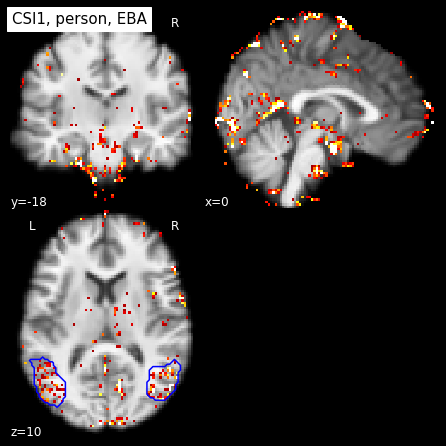

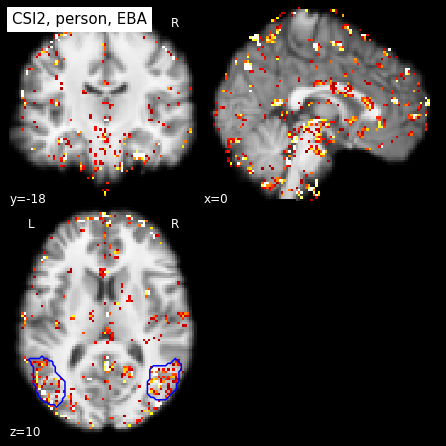

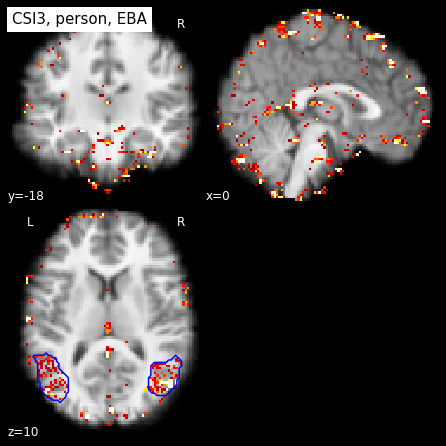

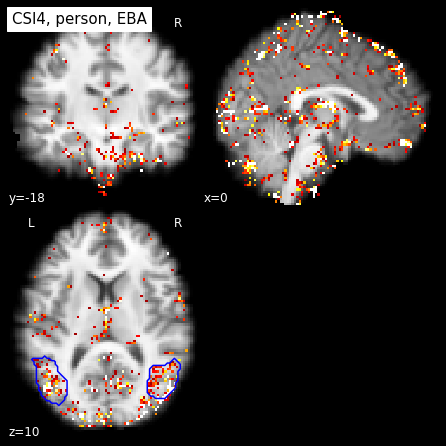

In [114]:
plot_ig('EBA', 0)

outdoor PPA


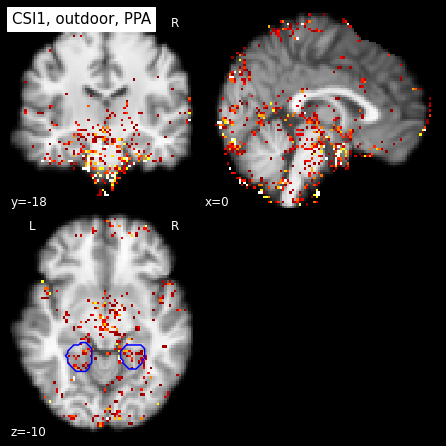

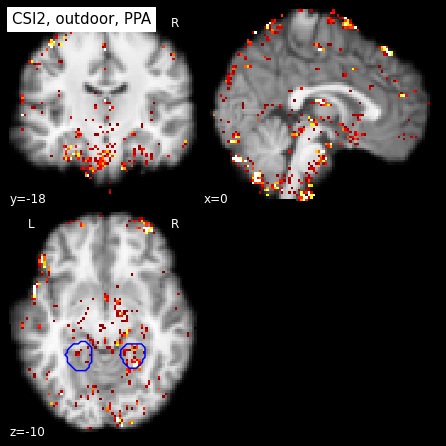

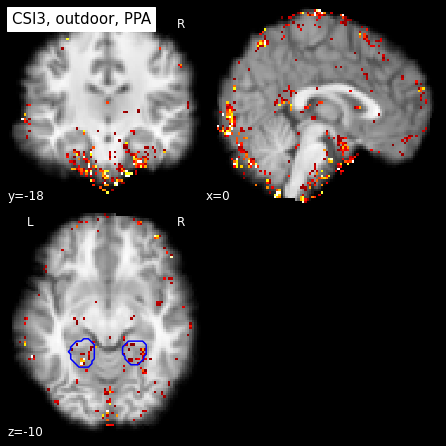

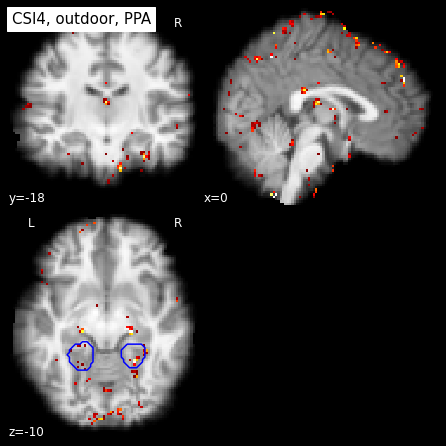

In [121]:
plot_ig('PPA', 92, vmin=1e-5, thr=1e-4, vmax=0.0005)

face FFA


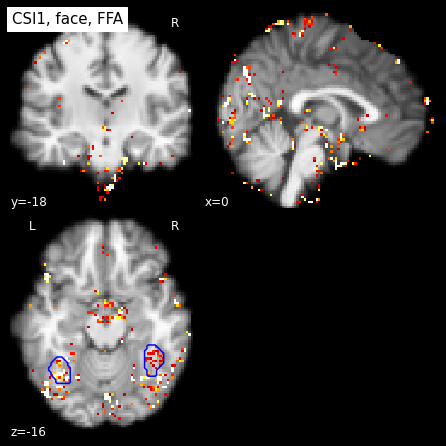

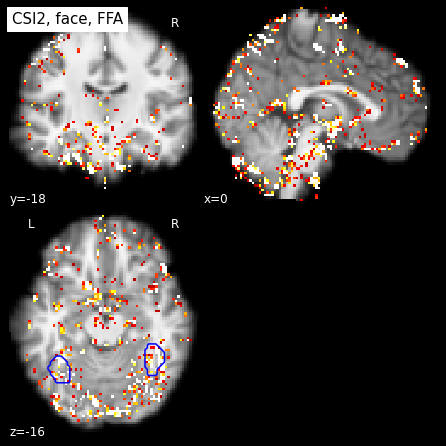

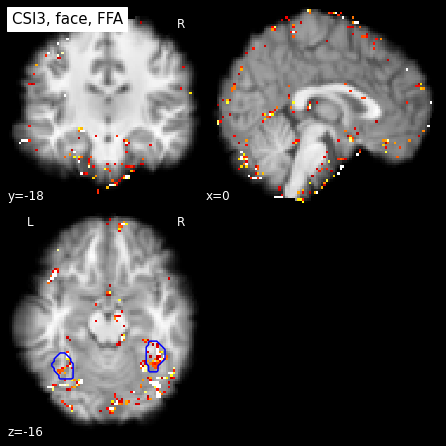

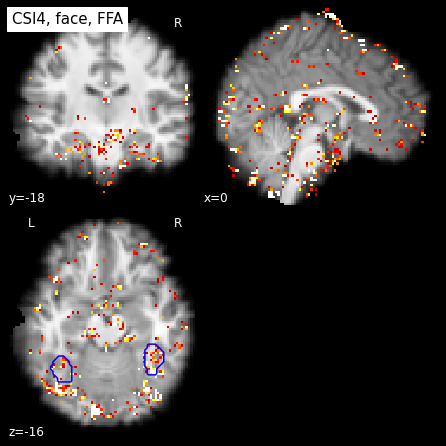

In [116]:
plot_ig('FFA', 90, vmin=2e-5, thr=4e-5, vmax=0.0001)

face OFA


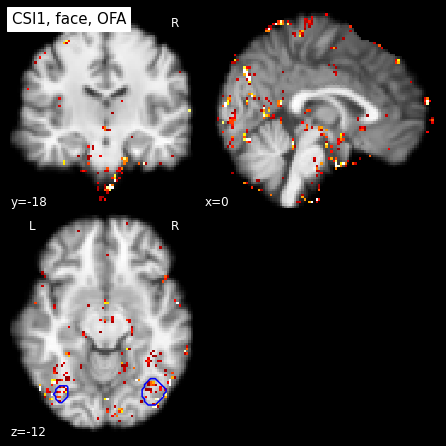

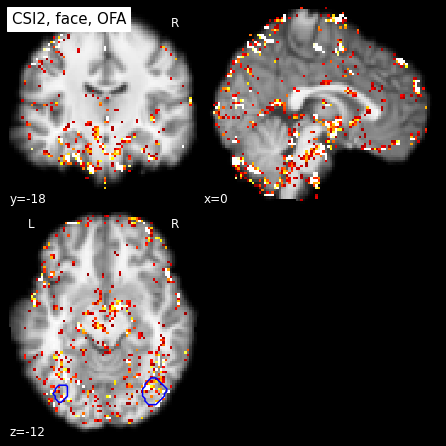

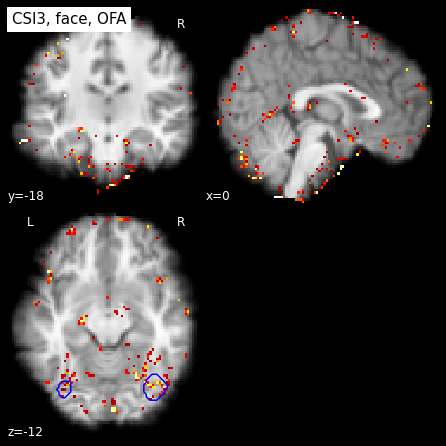

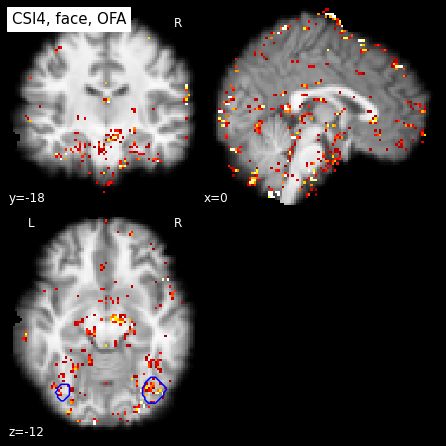

In [125]:
plot_ig('OFA', 90, vmin=1e-5, thr=4e-5, vmax=0.00015)